In [2]:
import numpy as np
import multiprocessing as mp
import glob
import re
import matplotlib.pyplot as plt
from functions import weightsample, als, rk, brk, alstest, rktest, brktest, alswrite, rkwrite, brkwrite, listener, alsmp, rkmp, brkmp, read, extracterr

# Speed Comparisons

## RK vs BRK

In [3]:
%%time
error = rktest(b200, k = 4, niter = 100, kacziter = 1000)

Wall time: 19 s


In [6]:
%%time
error = brktest(b200, k = 4, s = 1, niter = 100, kacziter = 1000)

Wall time: 16.7 s


## ALS vs BRK

In [5]:
%%time
error = alstest(b200, k = 4, niter = 100*1000)

Wall time: 28.3 s


In [4]:
%%time
error = brktest(b200, k = 4, s = 200, niter = 100, kacziter = 1000)

Wall time: 33.3 s


# Sparse Tests

## 50x50 matrix

In [2]:
sfactor50 = np.random.choice(4, size=(50,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight50 = np.random.randint(0, 2, size=(4, 50))
s50 = np.matmul(sfactor50, sweight50)
np.count_nonzero(s50 == 0) / (s50.shape[0]*s50.shape[1])

0.5808

In [7]:
%%time
fname = "Errors/salserr50.txt"
alsmp(s50, k = 4, niter = 100, filename = fname, loop = 15)
salserr50 = np.asarray(read(fname)[:-1]).astype(float)
print(salserr50)

[0.38420618 0.29623185 0.42163281 0.40645825 0.37964073 0.41054305
 0.44203489 0.30687028 0.31597839 0.35182171 0.35256397 0.34254329
 0.31229496 0.4081136  0.40742362]
Wall time: 821 ms


In [8]:
%%time
fname = "Errors/srkerr50.txt"
rkmp(s50, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
srkerr50 = np.asarray(read(fname)[:-1]).astype(float)
print(srkerr50)

[1.18390955 0.98944136 1.05139001 1.12116848 1.13755777 1.10441665
 0.97488825 1.1612159  0.88377034 1.14643438 0.98412324 1.11999015
 1.11724917 1.24702333 0.98698378]
Wall time: 1min 14s


## 200x200 matrix

In [4]:
sfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight200 = np.random.randint(0, 2, size=(4, 200))
s200 = np.matmul(sfactor200, sweight200)
np.count_nonzero(s200 == 0) / (s200.shape[0]*s200.shape[1])

0.537825

In [6]:
%%time
fname = "Errors/salserr200.txt"
alsmp(s200, k = 4, niter = 100, filename = fname, loop = 15)
salserr200 = np.asarray(read(fname)[:-1]).astype(float)
print(salserr200)

[0.69800074 0.73315758 0.71624703 0.69565913 0.73224554 0.68052433
 0.70920118 0.71996476 0.72743624 0.74639007 0.73475631 0.71144318
 0.74228782 0.68695157 0.71392328]
Wall time: 1.21 s


In [4]:
%%time
fname = "Errors/srkerr200.txt"
rkmp(s200, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
srkerr200 = np.asarray(read(fname)[:-1]).astype(float)
print(srkerr200)

[1.07046558 0.96626291 0.98479957 0.98807484 0.98778605 1.04139922
 0.96825765 0.94717635 1.04365655 1.10103661 0.9967595  1.03074732
 1.06907494 0.9923334  0.93555844]
Wall time: 1min 42s


## 1000x1000 matrix

In [2]:
sfactor1k = np.random.choice(4, size=(1000,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight1k = np.random.randint(0, 2, size=(4, 1000))
s1k = np.matmul(sfactor1k, sweight1k)
np.count_nonzero(s1k == 0) / (s1k.shape[0]*s1k.shape[1])

0.5227

In [3]:
%%time
fname = "Errors/salserr1k.txt"
alsmp(s1k, k = 4, niter = 100, filename = fname, loop = 15)
salserr1k = np.asarray(read(fname)[:-1]).astype(float)
print(salserr1k)

[0.80573552 0.80216327 0.80657376 0.81001677 0.80149177 0.79916573
 0.80612909 0.80201629 0.80344161 0.8027064  0.80175479 0.81126418
 0.80535349 0.80105497 0.81371224]
Wall time: 10.6 s


In [7]:
%%time
fname = "Errors/srkerr1k.txt"
rkmp(s1k, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
srkerr1k = np.asarray(read(fname)[:-1]).astype(float)
print(srkerr1k)

[0.86994533 0.89335083 0.89514653 0.86829225 0.87297784 0.88015126
 0.85873812 0.85388062 0.87639941 0.8800276  0.85929324 0.88330288
 0.89778083 0.88504959 0.86998381]
Wall time: 5min 32s


## 10,000x10,000 matrix

In [2]:
sfactor10k = np.random.choice(4, size=(10000,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight10k = np.random.randint(0, 2, size=(4, 10000))
s10k = np.matmul(sfactor10k, sweight10k)
np.count_nonzero(s10k == 0) / (s10k.shape[0]*s10k.shape[1])

0.52061855

In [5]:
%%time
fname = "Errors/salserr10k.txt"
alsmp(s10k, k = 4, niter = 100, filename = fname, loop = 15, cores = 4)
salserr10k = np.asarray(read(fname)[:-1]).astype(float)
print(salserr10k)

[0.82840739 0.82504429 0.82773252 0.82928556 0.82763171 0.8285348
 0.82737003 0.82887042 0.82889542 0.82897594 0.82679751 0.82827703
 0.82912263 0.82773023 0.82671306]
Wall time: 15min 20s


In [3]:
%%time
fname = "Errors/srkerr1k.txt"
rkmp(s10k, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15, cores = 4)
srkerr10k = np.asarray(read(fname)[:-1]).astype(float)
print(srkerr10k)

[0.83244402 0.83470777 0.83289428 0.83317762 0.83294385 0.83295922
 0.83548145 0.8348696  0.8370164  0.83495175 0.83510294 0.83435118
 0.83360504 0.8334269  0.83836676]
Wall time: 59min 1s


## Error Plots

In [2]:
datapath = 'Errors/*.txt'
datafiles = list(glob.glob(datapath))

In [3]:
title, err, std = extracterr("sals", datafiles)

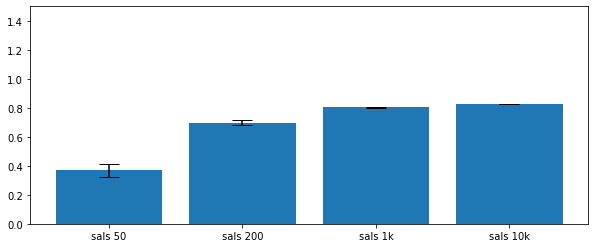

In [4]:
objects = title
y_pos = np.arange(len(objects))
performance = err
plt.figure(figsize=(10,4))
plt.bar(y_pos, performance, yerr=std, 
        ecolor='black', capsize=10)
plt.xticks(y_pos, objects)
plt.ylim([0, 1.5]) 
plt.show()

# Dense Tests

## 50x50 matrix

In [5]:
dfactor50 = np.random.choice(4, size=(50,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
dweight50 = np.random.randint(0, 2, size=(4, 50))
d50 = np.matmul(dfactor50, dweight50)
np.count_nonzero(d50 == 0) / (d50.shape[0]*d50.shape[1])

0.5364

In [6]:
%%time
fname = "Errors/dalserr50.txt"
alsmp(d50, k = 4, niter = 100, filename = fname, loop = 15)
dalserr50 = np.asarray(read(fname)[:-1]).astype(float)
print(dalserr50)

[0.43371888 0.37504556 0.4476757  0.25585386 0.38419529 0.26802343
 0.32854191 0.4541685  0.37170317 0.27079105 0.32981316 0.33864429
 0.35125232 0.31467782 0.32253532]
Wall time: 1.73 s


In [7]:
%%time
fname = "Errors/drkerr50.txt"
rkmp(d50, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
drkerr50 = np.asarray(read(fname)[:-1]).astype(float)
print(drkerr50)

[0.82063677 0.9265537  0.94625839 0.93323904 1.13555342 0.96528852
 0.93338154 0.9885525  0.98971829 1.01658153 0.89295443 0.93343437
 0.84803218 1.20651647 1.00107148]
Wall time: 1min 11s


## 200x200 matrix

In [8]:
dfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
dweight200 = np.random.randint(0, 2, size=(4, 200))
d200 = np.matmul(dfactor200, dweight200)
np.count_nonzero(d200 == 0) / (d200.shape[0]*d200.shape[1])

0.509125

In [9]:
%%time
fname = "Errors/dalserr200.txt"
alsmp(d200, k = 4, niter = 100, filename = fname, loop = 15)
dalserr200 = np.asarray(read(fname)[:-1]).astype(float)
print(dalserr200)

[0.71115283 0.67016919 0.69945936 0.70162428 0.71926671 0.71245664
 0.71715277 0.70377826 0.70599016 0.70705302 0.70836051 0.69214348
 0.71275215 0.71835256 0.67173452]
Wall time: 1.22 s


In [10]:
%%time
fname = "Errors/drkerr200.txt"
rkmp(d200, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
drkerr200 = np.asarray(read(fname)[:-1]).astype(float)
print(drkerr200)

[1.01963463 0.97079728 1.03464515 0.95089754 0.95455478 1.00505888
 0.92972789 0.951526   1.01876916 0.96120489 0.96973967 0.98574261
 0.97856256 0.98248655 0.95849656]
Wall time: 1min 42s


## 1000x1000 matrix

In [11]:
dfactor1k = np.random.choice(4, size=(1000,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
dweight1k = np.random.randint(0, 2, size=(4, 1000))
d1k = np.matmul(dfactor1k, dweight1k)
np.count_nonzero(d1k == 0) / (d1k.shape[0]*d1k.shape[1])

0.527848

In [12]:
%%time
fname = "Errors/dalserr1k.txt"
alsmp(d1k, k = 4, niter = 100, filename = fname, loop = 15)
dalserr1k = np.asarray(read(fname)[:-1]).astype(float)
print(dalserr1k)

[0.80175321 0.8093114  0.80925409 0.81665466 0.81168322 0.80925443
 0.81157313 0.80596311 0.81263762 0.80673858 0.80446207 0.80468717
 0.81520691 0.81214437 0.80760215]
Wall time: 10.6 s


In [13]:
%%time
fname = "Errors/drkerr1k.txt"
rkmp(d1k, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
drkerr1k = np.asarray(read(fname)[:-1]).astype(float)
print(drkerr1k)

[0.88270027 0.90038003 0.8839765  0.87921343 0.90591946 0.88834747
 0.88359043 0.87638335 0.86235977 0.87447296 0.88892988 0.87761509
 0.8928802  0.8655829  0.87650785]
Wall time: 4min 28s


## 10,000x10,000 matrix

In [3]:
dfactor10k = np.random.choice(4, size=(10000,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
dweight10k = np.random.randint(0, 2, size=(4, 10000))
d10k = np.matmul(dfactor10k, dweight10k)
np.count_nonzero(d10k == 0) / (d10k.shape[0]*d10k.shape[1])

0.52176539

In [4]:
%%time
fname = "Errors/dalserr10k.txt"
alsmp(d10k, k = 4, niter = 100, filename = fname, loop = 15, cores = 4)
dalserr10k = np.asarray(read(fname)[:-1]).astype(float)
print(dalserr10k)

[0.82758483 0.82759903 0.82615887 0.82560387 0.82811139 0.82593277
 0.82680554 0.82897845 0.82587531 0.82538244 0.82798453 0.82888699
 0.82907092 0.82791305 0.8254652 ]
Wall time: 15min 8s


In [16]:
%%time
fname = "Errors/drkerr1k.txt"
rkmp(d10k, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15, cores = 4)
drkerr10k = np.asarray(read(fname)[:-1]).astype(float)
print(drkerr10k)

[0.83362111 0.83669867 0.83653116 0.83365747 0.83397088 0.83552995
 0.83287161 0.83707044 0.83829668 0.834655   0.83698502 0.83588861
 0.83437458 0.83500614 0.83690027]
Wall time: 57min 36s


# BRK Sampling Tests

In [3]:
bfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
bweight200 = np.random.randint(0, 2, size=(4, 200))
b200 = np.matmul(bfactor200, bweight200)
np.count_nonzero(b200 == 0) / (b200.shape[0]*b200.shape[1])

0.5279

In [ ]:
%%time
i = 2
while(i <= 100):
    fname = "Errors/BRK/sbrk" + str(i) + "err200.txt"
    brkmp(b200, k = 4, s = i, niter = 100, kacziter = 1000, filename = fname, loop = 15)
    i = i + 2

In [ ]:
%%time
s = 1
fname = "Errors/BRK/sbrk" + str(s) + "err200.txt"
brkmp(b200, k = 4, s = s, niter = 100, kacziter = 1000, filename = fname, loop = 15)
brk1err200 = np.asarray(read(fname)[:-1]).astype(float)
print(brk1err200)